# Iris Flower Classification

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


### Loading Iris flower data as a dataframe using pandas
The dataset has been taken from 'kaggle.com'.

In [2]:
df=pd.DataFrame(pd.read_csv("data/IRIS.csv"))
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Let's check how many different species we have

In [3]:
n_of_species=set(df['species'])
n_of_species

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

We have 3 target species :
Iris-setosa, Iris-versicolor, Iris-virginica

In [4]:
x=df.drop(columns='species')
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y=df['species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

### Mapping integers to our iutput labels.

In [6]:
# Convert species labels to integers using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Check the encoded integer labels
print(y_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
# Check the mapping between encoded integers and species labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


### Visualizing data

In [8]:
x.shape,y_encoded.shape

((150, 4), (150,))

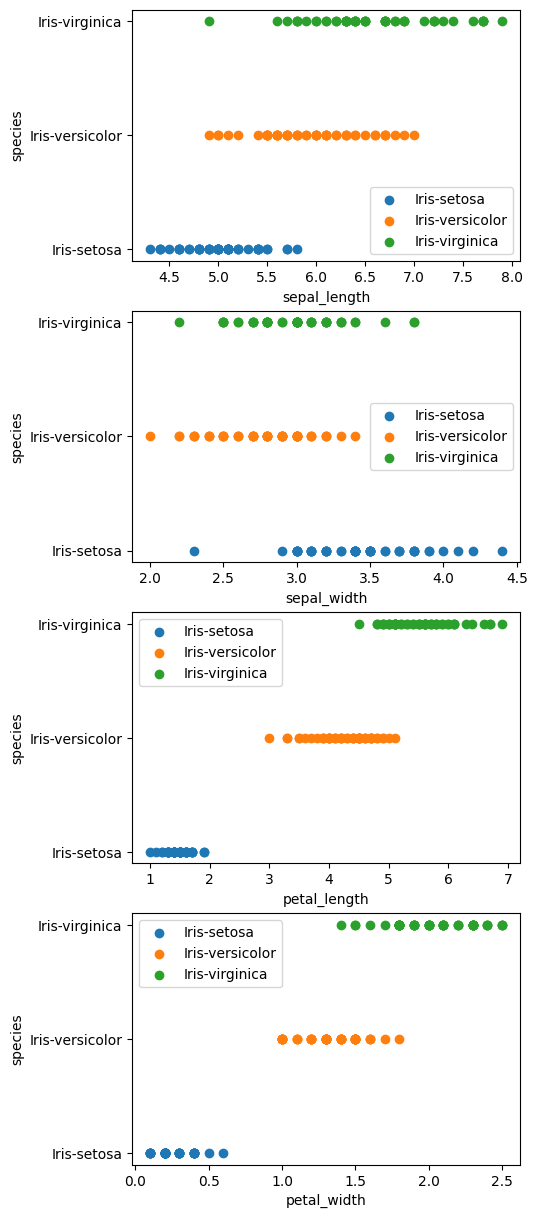

In [9]:
# List of features
features = ['sepal_length', 'sepal_width','petal_length', 'petal_width']

# Plot each species separately against each feature
fig, ax = plt.subplots(len(features), 1, figsize=(5, 15))

for i, feature in enumerate(features):
    for species, data in df.groupby('species'):
        ax[i].scatter(data[feature], data['species'], label=species)
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel("species")
    ax[i].legend()

plt.show()

### Splitting data into training and testing

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, train_size=0.6, random_state=1)

In [11]:
X_train.shape,y_train.shape

((90, 4), (90,))

### We will be making a Neural Network(NN) for our model.

In [12]:
tf.random.set_seed(1234)  # applied to achieve consistent results

model = Sequential(
    [ 
        Dense(72, activation = 'relu'),
        Dense(36, activation = 'relu'),
        Dense(3, activation = 'softmax')  
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train,y_train,
    epochs=50
)

Epoch 1/50
3/3 [==============================] - 1s 4ms/step - loss: 1.2494
Epoch 2/50
3/3 [==============================] - 0s 0s/step - loss: 1.1080
Epoch 3/50
3/3 [==============================] - 0s 4ms/step - loss: 1.0268
Epoch 4/50
3/3 [==============================] - 0s 4ms/step - loss: 0.9754
Epoch 5/50
3/3 [==============================] - 0s 4ms/step - loss: 0.9360
Epoch 6/50
3/3 [==============================] - 0s 0s/step - loss: 0.8951
Epoch 7/50
3/3 [==============================] - 0s 0s/step - loss: 0.8518
Epoch 8/50
3/3 [==============================] - 0s 0s/step - loss: 0.8138
Epoch 9/50
3/3 [==============================] - 0s 4ms/step - loss: 0.7825
Epoch 10/50
3/3 [==============================] - 0s 4ms/step - loss: 0.7525
Epoch 11/50
3/3 [==============================] - 0s 755us/step - loss: 0.7143
Epoch 12/50
3/3 [==============================] - 0s 0s/step - loss: 0.6843
Epoch 13/50
3/3 [==============================] - 0s 0s/step - loss: 0.6589

### Predicting on our training data

In [13]:
predicted=model.predict(X_train)

3/3 [==============================] - 0s 4ms/step


### Calculating accuracy

In [14]:
# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(predicted, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred_labels)

print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


### Predicting on our testing data

In [15]:
predicted_test=model.predict(X_test)

2/2 [==============================] - 0s 0s/step


### Calculating accuracy for our testing data

In [16]:
# Convert the predicted probabilities to class labels
y_pred_test_labels = np.argmax(predicted_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_test_labels)

print("Accuracy:", accuracy)

Accuracy: 0.9833333333333333


## Plotting our results

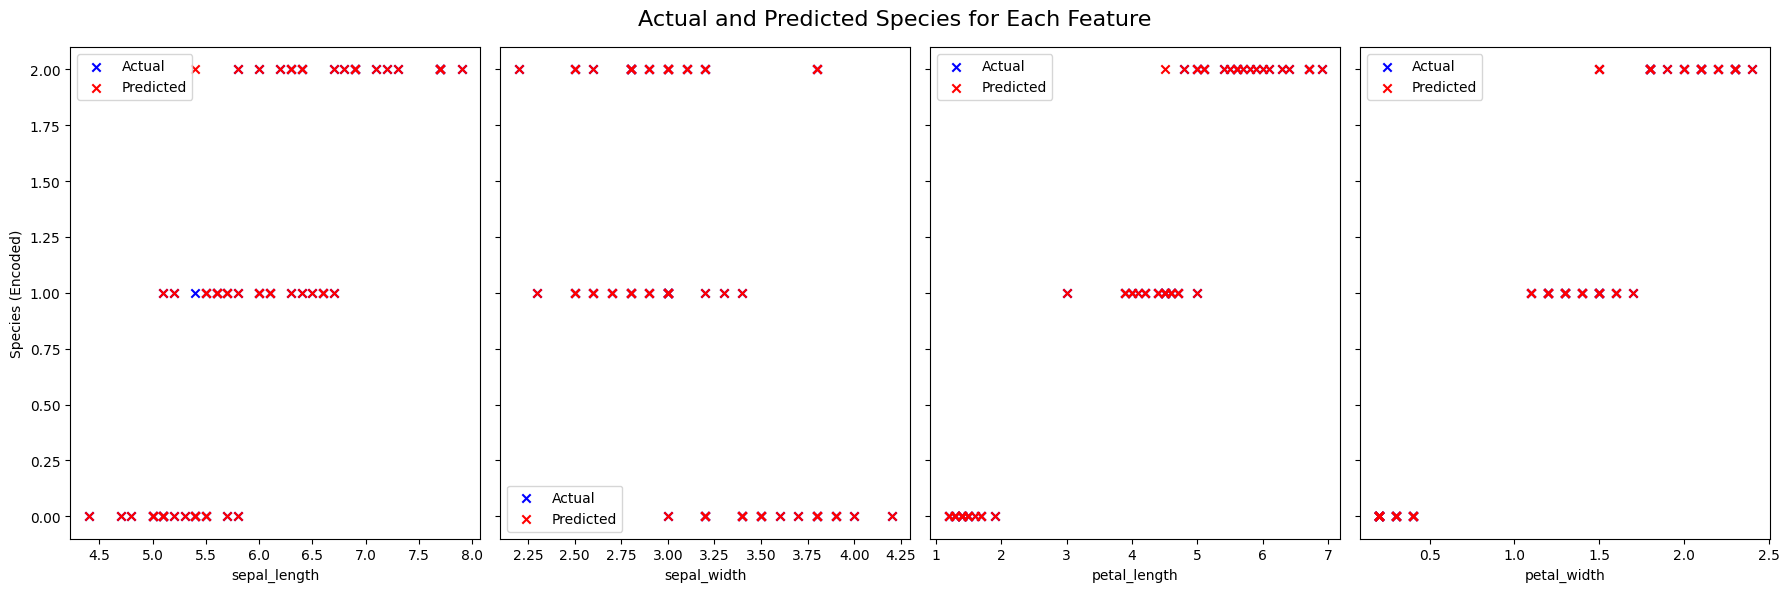

In [17]:
# Create a DataFrame to hold the actual and predicted species along with the features
df_pred_actual = pd.DataFrame(X_test, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df_pred_actual['Actual Species'] = y_test
df_pred_actual['Predicted Species'] = y_pred_test_labels

# Plot the actual and predicted species for each feature
fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharey=True)

for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    ax = axes[i]
    ax.scatter(df_pred_actual[feature], df_pred_actual['Actual Species'], c='b', label='Actual', marker='x')
    ax.scatter(df_pred_actual[feature], df_pred_actual['Predicted Species'], c='r', label='Predicted', marker='x')
    ax.set_xlabel(feature)
    ax.legend()

axes[0].set_ylabel('Species (Encoded)')
fig.suptitle('Actual and Predicted Species for Each Feature', fontsize=16)
plt.tight_layout()
plt.show()


As you can see, we can barely see any blue marks as our model is predicting species at over 98% accuracy.

## Final results

### Accuracy on training data = 96.66%
### Accuracy on testing data  = 98.33%

Having a small difference between training and testing accuracies (0.96 vs. 0.98) suggests that our model is not suffering from severe overfitting, and it is likely that it is now properly generalizing to new data.

*Note* :
     When you will run the jupyter notebook the results may vary by few         percentages as each run makes a new model and learns in a different way, but still we are getting around 95% accuracy in both training and testing data on average.